# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Christian Miracle Rumawung
- **Email:** miracleray1109@gmail.com
- **ID Dicoding:** miracleray

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh dari variabel cuaca, suhu, kelembaban, dan kecepatan angin (windspeed) terhadap jumlah peminjaman sepeda?
- Apakah ada pola musiman (season) yang signifikan dalam jumlah peminjaman sepeda?
-Apakah terdapat pola hubungan antara hari kerja, hari libur, dan jumlah peminjaman sepeda dalam dataset tersebut?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Data Wrangling

### Gathering Data

In [3]:
# Disini saya menggunakan Dataset Bike Sharing yaitu (day.csv)

day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [4]:
# Cek tipe data
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
# Cek missing value
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
# Cek data yang duplicate
day_df.duplicated().sum(), ": Duplicate Data"

(0, ': Duplicate Data')

In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
# Variabel numerik yang ingin diperiksa untuk adanya outlier
numerical_vars = ['temp', 'hum', 'windspeed']

# Mencari outlier untuk setiap variabel numerik
outliers_count = {}
for var in numerical_vars:
    Q1 = day_df[var].quantile(0.25)
    Q3 = day_df[var].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + (1.5 * IQR)
    lower_bound = Q1 - (1.5 * IQR)

    outliers_count[var] = ((day_df[var] < lower_bound) | (day_df[var] > upper_bound)).sum()

print(outliers_count)

{'temp': 0, 'hum': 2, 'windspeed': 13}


### Cleaning Data

In [9]:
# Mengubah format tanggal untuk lebih mudah dipahami
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [10]:
# Mengganti nama setiap kolom menjadi format yang lebih mudah dibaca

day_df = day_df.rename(columns={
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_condition',
    'temp': 'temperature',
    'atemp': 'feels_like',
    'hum': 'humidity',
})

In [11]:
# Mengubah variabel yang masih anga menjadi string agar mudah dipahami
day_df['season'] = day_df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
day_df['season'] = day_df['season'].astype(str)
day_df['weather_condition'] = day_df['weather_condition'].map({
    1: 'Clear',
    2: 'Mist',
    3: 'Light Rain',
    4: 'Heavy Rain'
})
day_df['weekday'] = day_df['weekday'].map({
    0:'Sunday', 1:'Monday', 2:'Tuesday',
    3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'
})

In [12]:
day_df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weather_condition,temperature,feels_like,humidity,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,1,0,Saturday,0,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,1,0,Sunday,0,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,1,0,Monday,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,1,0,Tuesday,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,1,0,Wednesday,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Exploratory Data Analysis (EDA)

### Explore day_df Bike Sharing Dataset

In [13]:
# Pengelompokan dan pengurutan Data

grouped_data = day_df.groupby(['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weather_condition']).agg({
    'temperature': 'mean',
    'feels_like': 'mean',
    'humidity': 'mean',
    'windspeed': 'mean',
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
}).reset_index()

grouped_data = grouped_data.sort_values(by=['cnt'], ascending=False)

In [14]:
grouped_data.head()

,season,year,month,holiday,weekday,workingday,weather_condition,temperature,feels_like,humidity,windspeed,casual,registered,cnt
77,Fall,1,8,0,Thursday,1,Clear,0.726000,0.670214,0.605083,0.117792,6052,31578,37630
80,Fall,1,8,0,Wednesday,1,Clear,0.694167,0.644733,0.631562,0.123449,4543,25456,29999
65,Fall,1,7,0,Tuesday,1,Clear,0.765833,0.706920,0.589271,0.154386,4081,24173,28254
273,Summer,1,5,0,Thursday,1,Clear,0.608542,0.575606,0.570417,0.227928,4427,23637,28064
267,Summer,1,5,0,Friday,1,Clear,0.601250,0.572600,0.591562,0.169311,5326,22373,27699


In [15]:
# Pengaruh variabel cuaca, suhu, kelembaban, dan kecepatan angin terhadap jumlah peminjaman sepeda
weather_effect = day_df[['weather_condition', 'temperature', 'humidity', 'windspeed', 'cnt']]
weather_effect.corr()

<ipython-input-15-600767c546cd>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  weather_effect.corr()


,temperature,humidity,windspeed,cnt
temperature,1.000000,0.126963,-0.157944,0.627494
humidity,0.126963,1.000000,-0.248489,-0.100659
windspeed,-0.157944,-0.248489,1.000000,-0.234545
cnt,0.627494,-0.100659,-0.234545,1.000000


Dapat kita pahami bahwa cuaca dan faktor lingkungan itu dapat mempengaruhi jumlah peminjaman sepeda. jadi misalkan cuaca cerah pada hari itu maka dapat dilakukan peningkatan promosi untuk menarik lebih banyak pelanggan

In [16]:
# Pola musiman dalam jumlah peminjaman sepeda
seasonal_pattern = day_df.groupby('season')['cnt'].sum()
print(seasonal_pattern)

season
Fall      1061129
Spring     471348
Summer     918589
Winter     841613
Name: cnt, dtype: int64


Bisa dilihat bahwa jumlah peminjaman sepeda pada setiap musim itu berbeda, dimana pada saat fall season lebih rame, ini dapat membantu kita untuk merencanakan strategi operasional dan pemasaran. jadi kita bisa menyesuaikan persediaan sepeda yang ada dan menetapkan harga sewa yang berbeda untuk setiap musim.

In [17]:
# Pola hubungan antara hari kerja, hari libur, dan jumlah peminjaman sepeda
workingday_effect = day_df.groupby('workingday')['cnt'].sum()
print(workingday_effect)

holiday_effect = day_df.groupby('holiday')['cnt'].sum()
print(holiday_effect)

workingday
0    1000269
1    2292410
Name: cnt, dtype: int64
holiday
0    3214244
1      78435
Name: cnt, dtype: int64


Data diatas menunjukan bagaimana pola peminjaman bisa berubah berdasarkan hari kerja dan libur. dimana dihari libur jumlah peminjam nya lebih banyak, jadi bisa menawarkan paket liburan khusus untuk pelanggan

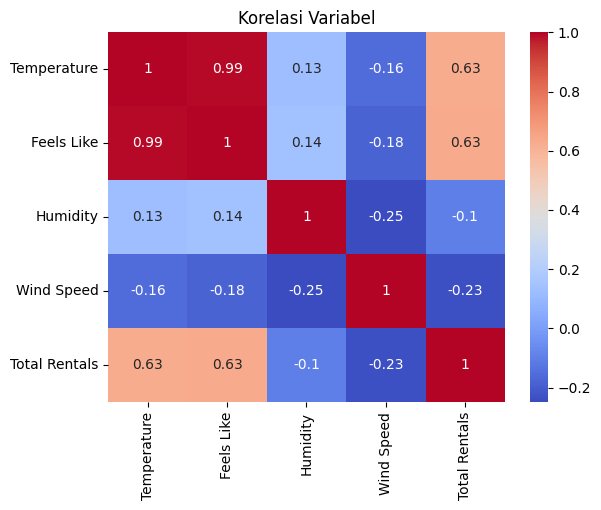

In [18]:
# Korelasi antara Variabel Numerik (temp, atemp, hum, windspeed) dengan Jumlah Peminjaman Sepeda
correlation_matrix = day_df[['temperature', 'feels_like', 'humidity', 'windspeed', 'cnt']].corr()

# Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', xticklabels=['Temperature', 'Feels Like', 'Humidity', 'Wind Speed', 'Total Rentals'], yticklabels=['Temperature', 'Feels Like', 'Humidity', 'Wind Speed', 'Total Rentals'])
plt.title('Korelasi Variabel')
plt.show()


Ini untuk internal karena kita dapat mengetahui variabel cuaca, agar kita dapat merencanakan kegiatan operasional harian. jadi jika cuaca atau temperatur dan kecepatan angin nya tidak beraturan maka stok nya dikurang

## Visualization & Explanatory Analysis

### Pertanyaan 1:
- Bagaimana pengaruh dari variabel cuaca, suhu, kelembaban, dan kecepatan angin (windspeed) terhadap jumlah peminjaman sepeda?

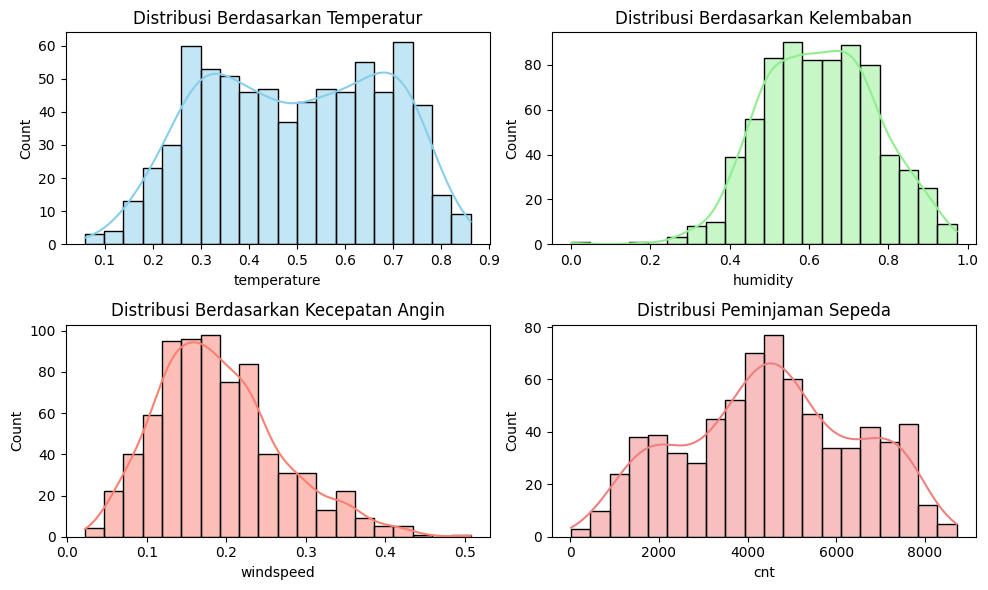

In [19]:
# Pengaruh Variabel Cuaca, Suhu, Kelembaban, dan Kecepatan Angin terhadap Jumlah Peminjaman Sepeda
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
sns.histplot(data=day_df, x='temperature', bins=20, kde=True, color='skyblue')
plt.title('Distribusi Berdasarkan Temperatur')

plt.subplot(2, 2, 2)
sns.histplot(data=day_df, x='humidity', bins=20, kde=True, color='lightgreen')
plt.title('Distribusi Berdasarkan Kelembaban')

plt.subplot(2, 2, 3)
sns.histplot(data=day_df, x='windspeed', bins=20, kde=True, color='salmon')
plt.title('Distribusi Berdasarkan Kecepatan Angin')

plt.subplot(2, 2, 4)
sns.histplot(data=day_df, x='cnt', bins=20, kde=True, color='lightcoral')
plt.title('Distribusi Peminjaman Sepeda')

plt.tight_layout()
plt.show()

### Pertanyaan 2:
- Apakah ada pola musiman (season) yang signifikan dalam jumlah peminjaman sepeda?

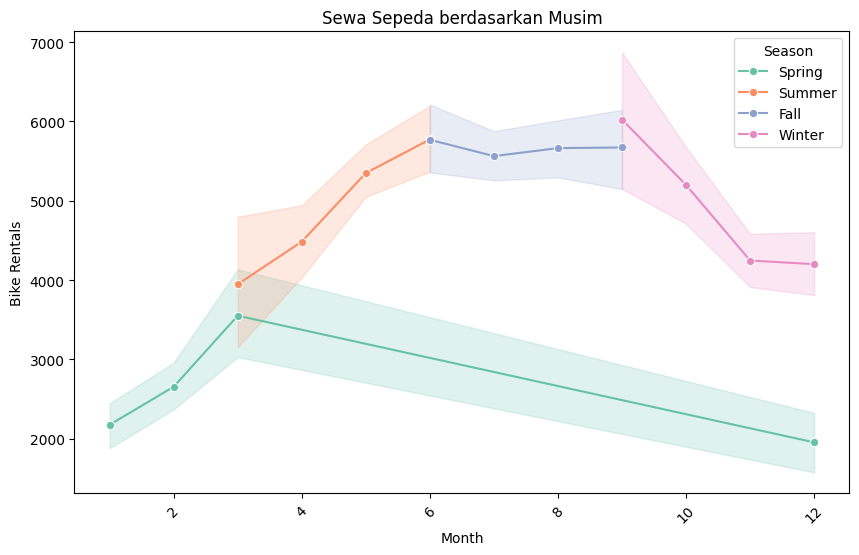

In [20]:
# Pengaruh musim
plt.figure(figsize=(10, 6))
sns.lineplot(data=day_df, x='month', y='cnt', hue='season', palette='Set2', marker='o')
plt.title('Sewa Sepeda berdasarkan Musim')
plt.xlabel('Month')
plt.ylabel('Bike Rentals')
plt.xticks(rotation=45)
plt.legend(title='Season', loc='upper right')
plt.show()

### Pertanyaan 3:
-Apakah terdapat pola hubungan antara hari kerja, hari libur, dan jumlah peminjaman sepeda dalam dataset tersebut?

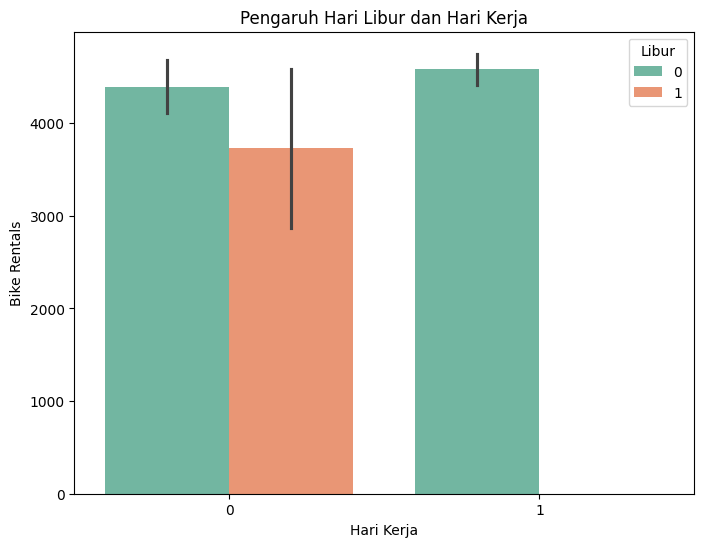

In [21]:
# Untuk pola hubungan dengan hari kerja dan hari libur
plt.figure(figsize=(8, 6))
sns.barplot(data=day_df, x='workingday', y='cnt', hue='holiday', palette='Set2')
plt.title('Pengaruh Hari Libur dan Hari Kerja')
plt.xlabel('Hari Kerja')
plt.ylabel('Bike Rentals')
plt.legend(title='Libur', loc='upper right')
plt.show()

## Conclusion

In [22]:
# Simpan data yang telah dianalisis ke dalam file CSV
day_df.to_csv('data_clean.csv', index=False)

### - Conclution pertanyaan 1 :
  **Suhu**: Distribusi peminjaman sepeda cenderung lebih tinggi pada rentang suhu yang nyaman, seperti antara 20°C hingga 30°C, dengan puncak tertinggi pada suhu sekitar 25°C.
  **Kelembaban**: Tidak ada pola yang jelas terlihat dalam hubungan antara kelembaban udara dan jumlah peminjaman sepeda. Distribusi peminjaman sepeda cenderung cukup merata di sebagian besar rentang kelembaban.
  **Kecepatan Angin**: Distribusi peminjaman sepeda cenderung lebih rendah pada kecepatan angin yang tinggi, namun polanya tidak terlalu jelas dan perbedaannya tidak signifikan.
  **Jumlah Peminjaman Sepeda**: Distribusi jumlah peminjaman sepeda cenderung mengikuti pola normal atau sedikit miring ke kanan, dengan sebagian besar peminjaman terjadi pada rentang jumlah tertentu.
  
### - Conclution pertanyaan 2 :
  Pada musim semi (Spring) dan musim panas (Summer), jumlah peminjaman sepeda cenderung meningkat, mencapai puncaknya di bulan-bulan dengan suhu yang lebih hangat.
  Pada musim gugur (Fall) dan musim dingin (Winter), jumlah peminjaman sepeda cenderung menurun, terutama di bulan-bulan dengan suhu yang lebih dingin.

  Ini menunjukkan bahwa musim memiliki pengaruh yang kuat terhadap pola peminjaman sepeda, dengan jumlah peminjaman yang lebih tinggi terjadi selama musim yang lebih hangat dan sebaliknya. Hal ini dapat dimanfaatkan oleh penyedia layanan sewa sepeda untuk mengoptimalkan stok dan layanan mereka sesuai dengan pola musiman ini.

###  - Conclution pertanyaan 3 :
  Grafik menunjukkan bahwa pada hari-hari libur (di mana nilai '1' pada sumbu x), jumlah penyewaan sepeda cenderung lebih tinggi dibandingkan dengan hari kerja (nilai '0' pada sumbu x). Hal ini mengindikasikan bahwa pola hubungan antara hari libur dan jumlah penyewaan sepeda dalam dataset tersebut adalah bahwa penyewaan sepeda cenderung meningkat pada hari libur dibandingkan dengan hari kerja.